## MATH1042: Peluang dan Statistika
# Tugas Pemrograman Proyek1B
### Kelompok 2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def install_to_int(install):
    val = 0
    if install[-1] == 'M' or install[-1] == 'm':
        val = float(install[0:len(install) - 1]) * 1e6
    elif install[-1] == 'K' or install[-1] == 'k':
        val = float(install[0:len(install) - 1]) * 1e3
    return int(val)

In [3]:
class Ukuran:

    def __init__(self, dataset, column, mode_interval):
        self.dataset = dataset
        self.data_col = dataset[column]
        self.column = column
        self.mean = self.data_col.mean()
        self.median = self.data_col.median()
        self.mode_raw = self.mode_f(mode_interval)
        self.mode = f"{self.mode_raw[1]} pada interval " \
                    f"({round(self.mode_raw[0], 2)}, " \
                    f"{round(self.mode_raw[2], 2)})"
        self.std_dev = self.data_col.std()
        self.var = self.std_dev ** 2
        self.q1, self.q3 = np.percentile(self.data_col, [25, 75])
        self.iqr = self.q3 - self.q1
        self.outlier_raw = self.outliers()
        self.outlier = self.outlier_raw[0][1], self.outlier_raw[1][1]

    def mode_f(self, interval):
        data_col_sorted = sorted(list(self.data_col))
        start = min(self.data_col) - interval
        end = max(self.data_col) + interval
        bins = int((end - start) / interval)
        intervals = np.linspace(start, end, bins)
        interval_index = 0
        mode_count = 0
        mode_list = []
        cur_mode_list = [0, 0, 0]
        for i in data_col_sorted:
            if i <= intervals[interval_index]:
                mode_count += 1
            else:
                if mode_count > cur_mode_list[1]:
                    cur_mode_list = [intervals[interval_index],
                                     mode_count,
                                     intervals[interval_index + 1]]

                mode_list.append([intervals[interval_index],
                                  mode_count,
                                  intervals[interval_index + 1]])
                mode_count = 1
                interval_index += 1
        return cur_mode_list

    def outliers(self):
        low_outlier = []
        low_outlier_size = 0
        high_outlier = []
        high_outlier_size = 0
        lower_bound = self.q1 - self.iqr * 1.5
        upper_bound = self.q3 + self.iqr * 1.5
        for i in self.data_col:
            if i < lower_bound:
                low_outlier.append(i)
                low_outlier_size += 1
            elif i > upper_bound:
                high_outlier.append(i)
                high_outlier_size += 1
        return (low_outlier, low_outlier_size), (high_outlier, high_outlier_size)

    def histogram(self, n_bins, log_base, save):
        fig, ax = plt.subplots(figsize=(18, 9))
        if log_base == 0:
            plt.title(f"Histogram {self.column} Linear Scale")
        else:
            plt.title(f"Histogram {self.column} (Log scale base{log_base})")
        plt.grid()
        sns.histplot(self.data_col, ax=ax, bins=n_bins, log_scale=log_base)
        if save:
            plt.savefig(f"{self.column}_histogram_log{log_base}.png")

    def relative_frequency_histogram(self, save):
        weight = np.zeros_like(self.data_col.values) + 1. / self.data_col.size
        fig, ax = plt.subplots()
        plt.title(f"Relative Frequency Histogram ({self.column})")
        plt.grid()
        ax.hist(self.data_col, weights=weight)
        ax.set_xlabel(self.column)
        ax.set_ylabel('Relative Frequency')
        if save:
            plt.savefig(f"{self.column}_rf_histogram_.png")

    def boxplot(self, is_log, save):
        if is_log:
            fig, ax = plt.subplots(figsize=(30, 6))
            ax.set_xscale("log")
            plt.title(f"Boxplot {self.column} Log Scale")
            plt.grid()
            sns.boxplot(x=self.data_col, ax=ax)
            if save:
                plt.savefig(f"{self.column}_boxplot_log.png")
        elif is_log is False:
            fig, ax = plt.subplots(figsize=(30, 6))
            plt.title(f"Boxplot {self.column}")
            plt.grid()
            sns.boxplot(x=self.data_col, ax=ax)
            if save:
                plt.savefig(f"{self.column}_boxplot_.png")

    def describe_all(self):
        print(self.column)
        print(f"Rata - rata: {self.mean}")
        print(f"Median: {self.median}")
        print(f"Modus: {self.mode}")
        print(f"Variansi: {self.var}")
        print(f"Standar Deviasi: {self.std_dev}")
        print(f"Kuartil 1: {self.q1}")
        print(f"Kuartil 3: {self.q3}")
        print(f"Jarak Interkuartil: {self.iqr}")
        print(f"Pencilan: {self.outlier}")

    def pertanyaan_a(self, bound):
        installs_list = []
        avg_n = 0
        n = 0
        if self.column != 'int installs':
            print("pertanyaan A hanya untuk parameter installs!")
            return
        for index, i in self.dataset.iterrows():
            if i['int installs'] >= bound:
                installs_list.append(i['int installs'])
                avg_n += i['int installs']
                n += 1
        avg_target = avg_n / n

        if avg_target < self.mean:
            return -1 * avg_target / self.mean

        elif avg_target > self.mean:
            return avg_target / self.mean

    def pertanyaan_a_plot(self, end, n_datas, save, log_scale):
        start = int(self.mean)
        x_ax = np.linspace(start, end, n_datas)
        x_ax_log = np.logspace(np.log10(self.mean), np.log10(max(self.data_col)), n_datas, base=10)
        y_ax = []
        for i in x_ax:
            y_ax.append(self.pertanyaan_a(i))
        plt.grid()
        plt.title(f"Plot Pertanyaan Diskusi A\nNilai Keterpencilan")
        plt.xlabel(f"Batas keterpencilan")
        plt.ylabel(f"Nilai Keterpencilan")
        if log_scale:
            plt.plot(x_ax_log, y_ax)
        else:
            plt.plot(x_ax, y_ax)
        if save:
            plt.savefig(f"pertanyaan_a_plot.png")

    def pertanyaan_b(self):
        if self.column != 'total ratings':
            print('pertanyaan B hanya untuk parameter total ratings!')
            return
        number_of_indexes = len(self.data_col) / 1000
        n_o_i = int(number_of_indexes)
        upper_percentage = number_of_indexes - n_o_i
        in_between = self.data_col[n_o_i - 1] - self.data_col[n_o_i]
        print(f"{self.data_col[n_o_i - 1]} - {self.data_col[n_o_i]}")
        print(f"{self.data_col[n_o_i - 1]} - {upper_percentage} * {in_between}")
        bound = self.data_col[n_o_i - 1] - upper_percentage * in_between
        print(n_o_i, self.data_col[0:n_o_i])
        print(bound)

In [4]:
data_raw = pd.read_csv("Dataset1B.csv")
data = data_raw.drop(['average rating',
                      'growth (30 days)',
                      'growth (60 days)',
                      'price',
                      'category',
                      '3 star ratings',
                      'paid'],
                     axis=1)
great = []
poor = []
installs_int = []
rating_index = []
tr_inst_index = []
final_game_score = []

for game in range(len(data)):
    great_val = data['5 star ratings'][game] + data['4 star ratings'][game]
    poor_val = data['2 star ratings'][game] + data['1 star ratings'][game]
    install_val = install_to_int(data['installs'][game])

    ri = great_val / poor_val
    trii = data['total ratings'][game] * install_val

    great.append(great_val)
    poor.append(poor_val)
    installs_int.append(install_val)

    rating_index.append(ri)
    tr_inst_index.append(trii)
    final_game_score.append(trii * ri)

data['great'] = great
data['poor'] = poor
data['int installs'] = installs_int
data['rating index'] = rating_index
data['total ratings and installs index'] = tr_inst_index
data['final game score'] = final_game_score

In [5]:
total_ratings = Ukuran(data, 'total ratings', 100_000)
installs = Ukuran(data, 'int installs', 100_000)
great = Ukuran(data, 'great', 10_000)
poor = Ukuran(data, 'poor', 10_000)

## Deskripsi Parameter

In [6]:
total_ratings.describe_all()
print()
installs.describe_all()
print()
great.describe_all()
print()
poor.describe_all()

total ratings
Rata - rata: 1101181.5410404624
Median: 457675.0
Modus: 312 pada interval (138586.01, 238760.02)
Variansi: 10967611812693.422
Standar Deviasi: 3311738.4879687317
Kuartil 1: 187998.75
Kuartil 3: 944334.25
Jarak Interkuartil: 756335.5
Pencilan: (0, 165)

int installs
Rata - rata: 28894624.27745665
Median: 10000000.0
Modus: 746 pada interval (10001000.0, 10101010.0)
Variansi: 3375661341819422.0
Standar Deviasi: 58100441.83841825
Kuartil 1: 5000000.0
Kuartil 3: 50000000.0
Jarak Interkuartil: 45000000.0
Pencilan: (0, 12)

great
Rata - rata: 910030.3271676301
Median: 367617.0
Modus: 52 pada interval (46643.05, 56645.73)
Variansi: 7625611211070.817
Standar Deviasi: 2761450.9249796234
Kuartil 1: 157423.25
Kuartil 3: 775977.75
Jarak Interkuartil: 618554.5
Pencilan: (0, 167)

poor
Rata - rata: 131598.83468208092
Median: 47221.5
Modus: 254 pada interval (10846.77, 20862.66)
Variansi: 188561019782.99524
Standar Deviasi: 434236.1336680715
Kuartil 1: 18421.5
Kuartil 3: 111270.0
Jarak I

## Plot Total Ratings

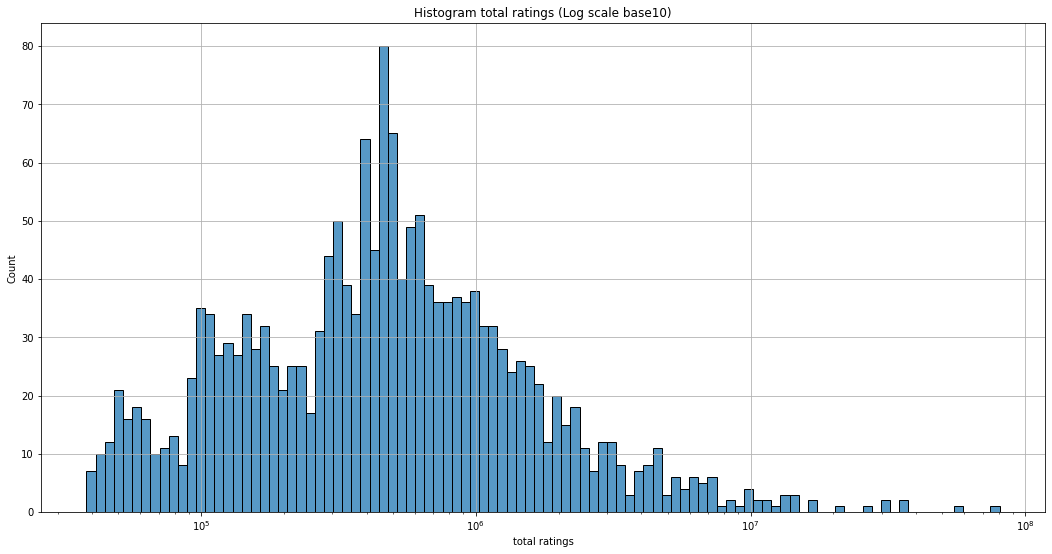

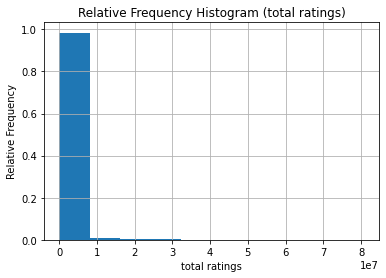

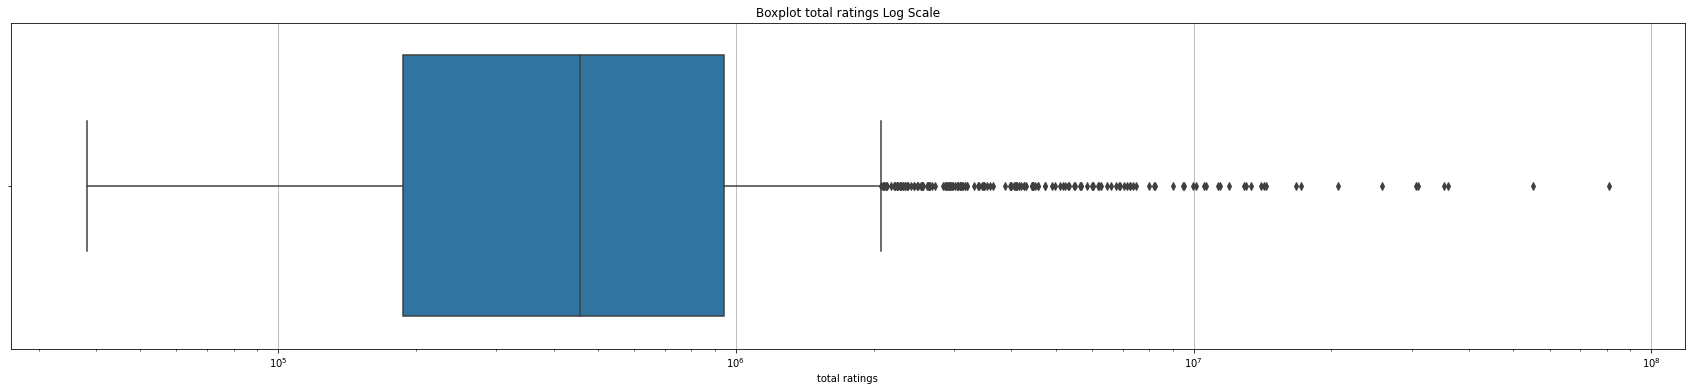

In [7]:
total_ratings.histogram(n_bins=100, log_base=10, save=False)
total_ratings.relative_frequency_histogram(save=False)
total_ratings.boxplot(is_log=True, save=False)

## Plot Installs

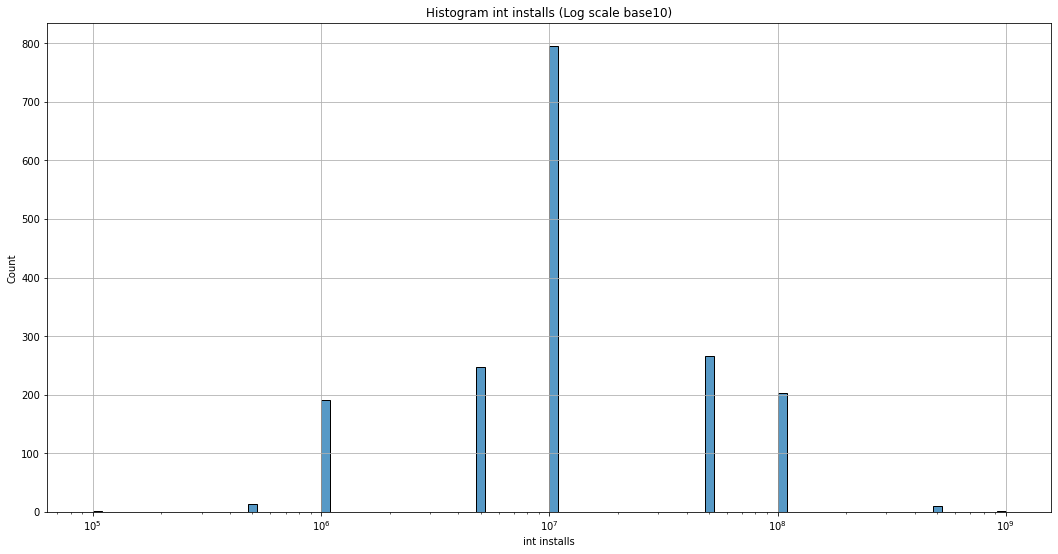

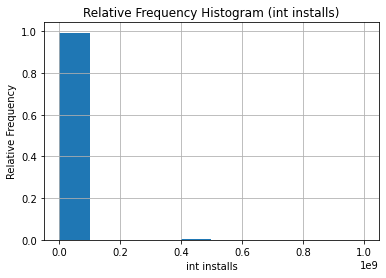

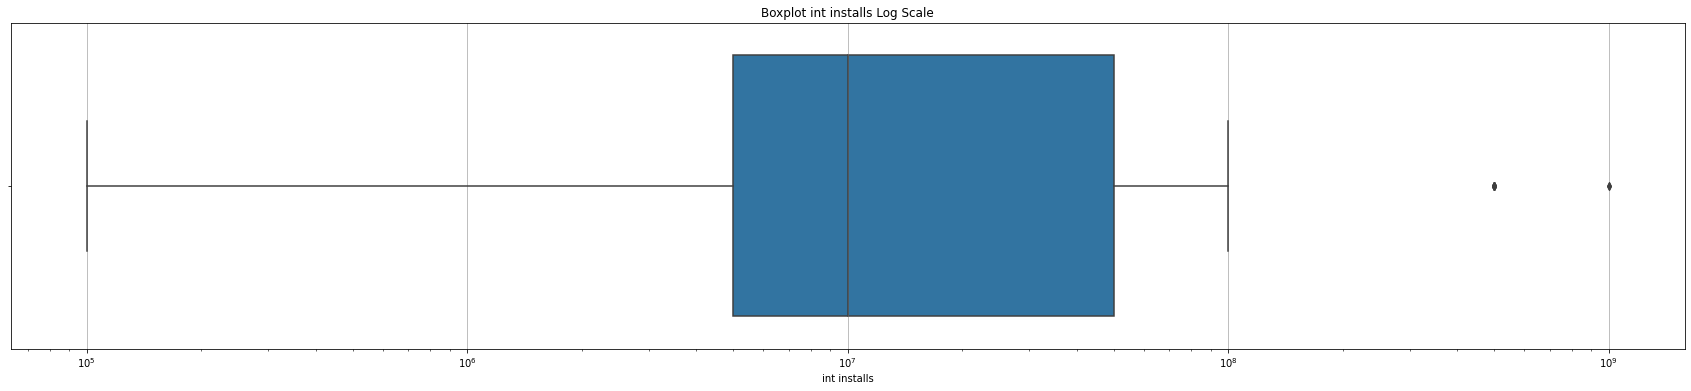

In [8]:
installs.histogram(n_bins=100, log_base=10, save=False)
installs.relative_frequency_histogram(save=False)
installs.boxplot(is_log=True, save=False)

## Plot Great

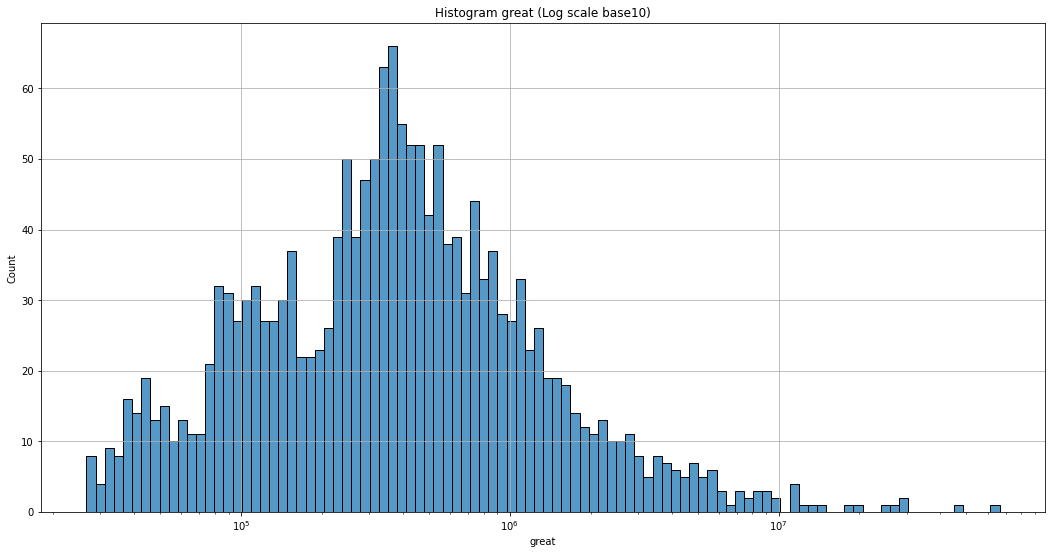

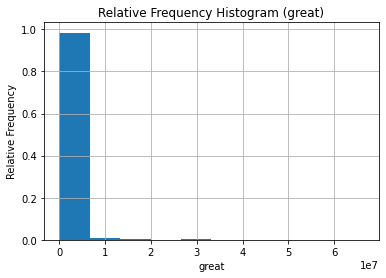

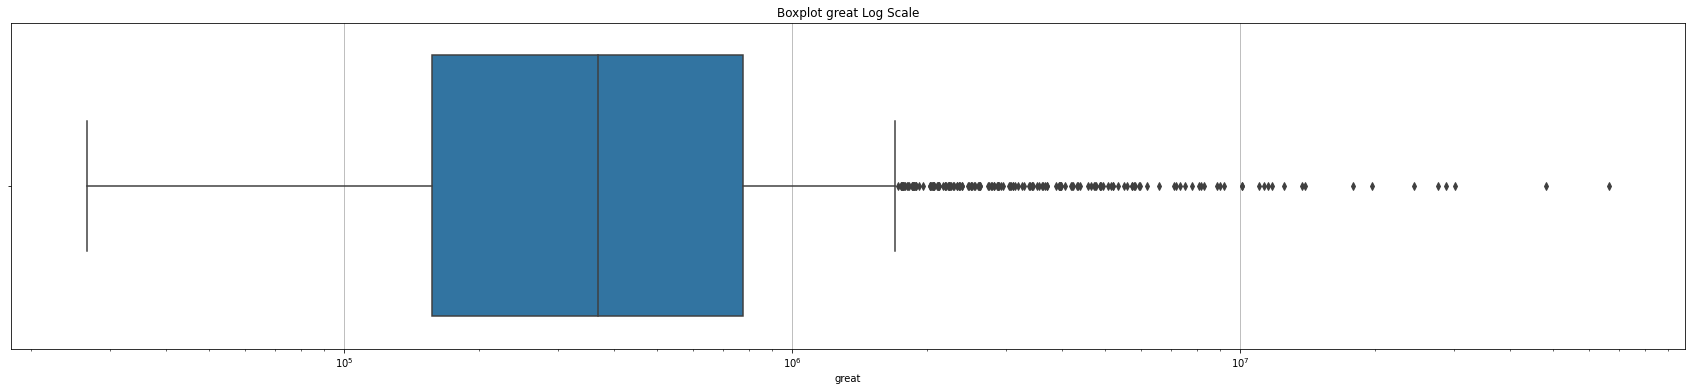

In [9]:
great.histogram(n_bins=100, log_base=10, save=False)
great.relative_frequency_histogram(save=False)
great.boxplot(is_log=True, save=False)

## Plot Poor

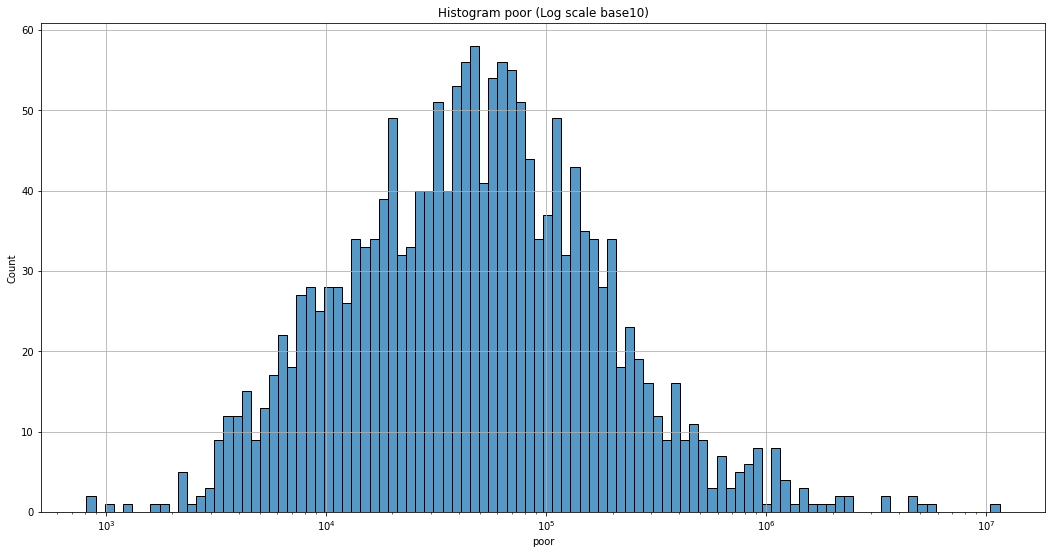

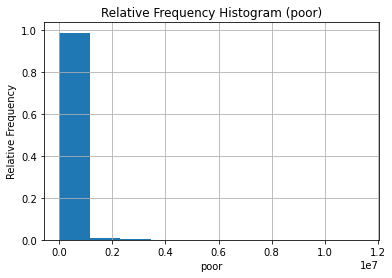

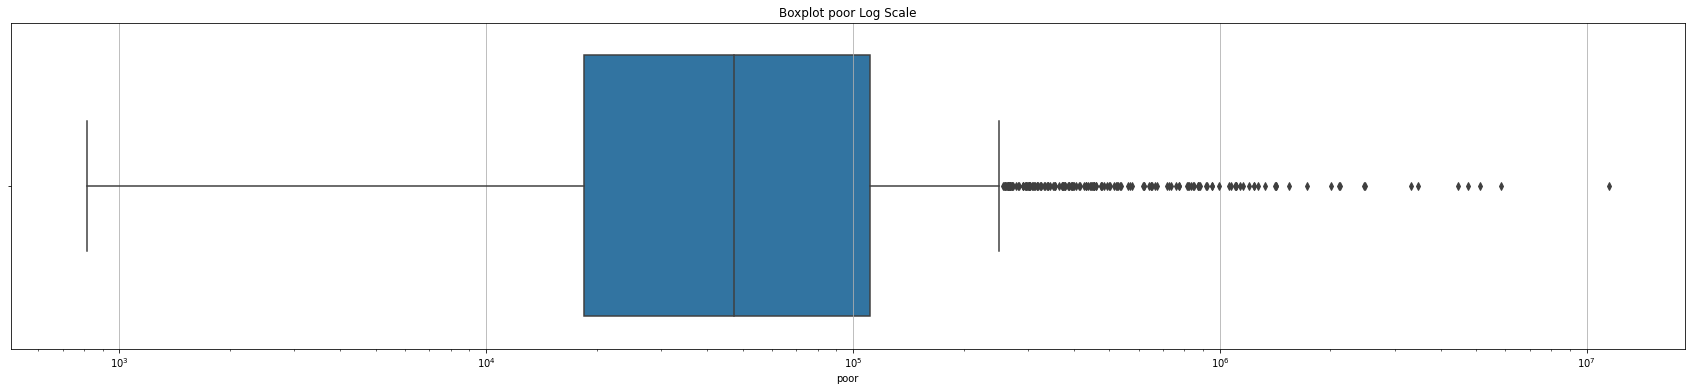

In [10]:
poor.histogram(n_bins=100, log_base=10, save=False)
poor.relative_frequency_histogram(save=False)
poor.boxplot(is_log=True, save=False)

## Pertanyaan Diskusi A

In [11]:
installs.pertanyaan_a(100_000_000 + 1)

20.188299655048475

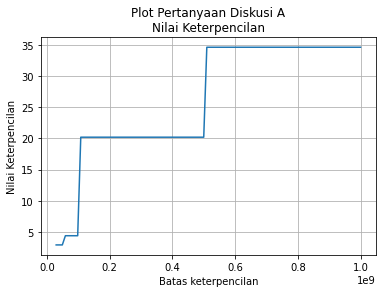

In [12]:
installs.pertanyaan_a_plot(max(installs.data_col), 100, save=False, log_scale=False)

## Pertanyaan Diskusi B

In [13]:
total_ratings.pertanyaan_b()

80678661 - 35971961
80678661 - 0.73 * 44706700
1 0    80678661
Name: total ratings, dtype: int64
48042770.0


## Pertanyaan Diskusi C

In [14]:
data_final = data.sort_values(by='final game score', ascending=False)

In [15]:
data_final.head()

,rank,title,total ratings,installs,5 star ratings,4 star ratings,2 star ratings,1 star ratings,great,poor,int installs,rating index,total ratings and installs index,final game score
622,1,Candy Crush Saga,30859251,1000.0 M,23521533,4128497,457810,1266557,27650030,1724367,1000000000,16.034887,30859251000000000,4.948246e+17
200,1,Subway Surfers,35305263,1000.0 M,26840330,3377645,801027,2667798,30217975,3468825,1000000000,8.711300,35305263000000000,3.075547e+17
1424,1,Clash of Clans,55170976,500.0 M,42736445,5397273,978099,3773793,48133718,4751892,500000000,10.129380,27585488000000000,2.794239e+17
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,61935712,4478738,1814999,9654037,66414450,11469036,500000000,5.790761,40339330500000000,2.335954e+17
623,2,My Talking Tom,16715691,500.0 M,12245585,1517427,445084,1661606,13763012,2106690,500000000,6.533003,8357845500000000,5.460183e+16
